In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# irgend eine config 
%matplotlib inline

# SVG-View
%config InlineBackend.figure_formats=['svg']

# Dataset
pokemon_dataset = pd.read_csv('../data/pokedex_420.csv')

pkmn_global = pokemon_dataset.drop(['Unnamed: 0', 'name', 'japanese_name', 'catch_rate', 'base_experience',
                                    'base_friendship', 'growth_rate', 'egg_cycles', 'egg_type_1', 'egg_type_2',
                                    'egg_type_number', 'percentage_male'], axis=1)

df = pkmn_global[pkmn_global['generation'] <= 3]
df.columns

Index(['pokedex_number', 'german_name', 'generation', 'is_sub_legendary',
       'is_legendary', 'is_mythical', 'species', 'type_number', 'type_1',
       'type_2', 'height_m', 'weight_kg', 'abilities_number', 'ability_1',
       'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

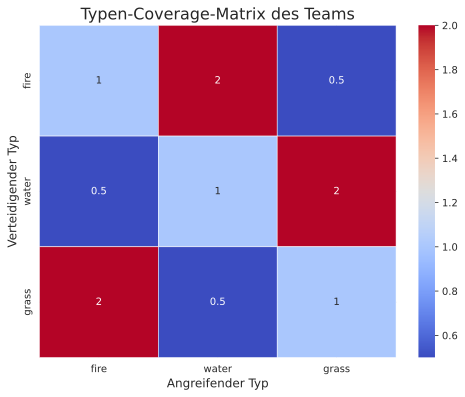

In [3]:
# Typen-Coverage-Matrix / Heatmap
coverage_data = {
    'fire': [1, 0.5, 2],
    'water': [2, 1, 0.5],
    'grass': [0.5, 2, 1],
}
coverage_df = pd.DataFrame(coverage_data, index=['fire', 'water', 'grass'])

plt.figure(figsize=(8, 6))
sns.heatmap(coverage_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Typen-Coverage-Matrix des Teams', fontsize=16)
plt.xlabel('Angreifender Typ', fontsize=12)
plt.ylabel('Verteidigender Typ', fontsize=12)
plt.show()
